In [212]:
#encoding: utf-8
import torch
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import DataLoader,Dataset
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
from sklearn.ensemble import RandomForestRegressor
import pickle
#import xgboost as xgb
print('imported!')

imported!


In [228]:
#import data for training
path=os.getcwd()+'/train.csv'#/sample_submission.csv'
all_data=pd.read_csv(path)

In [229]:
#all_data.columns
#all_data.index
#all_data.iloc[1]
data_train=all_data
data_train.info()
data_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [215]:
all_data=np.array(all_data)
#shuffle
#np.random.shuffle(all_data)
row_num=len(all_data)
#snapshot
print(all_data[0])
print(all_data[1])
print(all_data[2])
print(row_num)


[1 0 3 'Braund, Mr. Owen Harris' 'male' 22.0 1 0 'A/5 21171' 7.25 nan 'S']
[2 1 1 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 'female' 38.0
 1 0 'PC 17599' 71.2833 'C85' 'C']
[3 1 3 'Heikkinen, Miss. Laina' 'female' 26.0 0 0 'STON/O2. 3101282' 7.925
 nan 'S']
891


/home/hmx/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


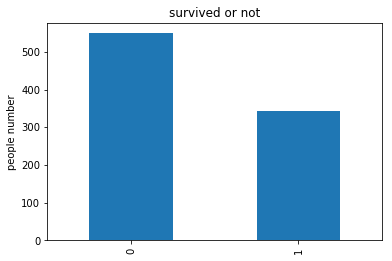

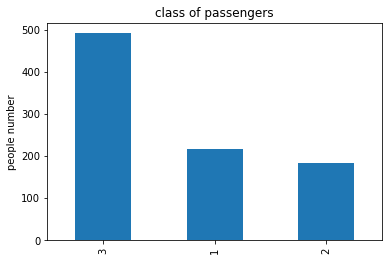

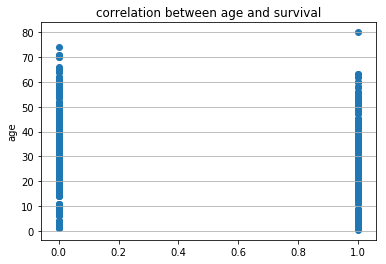

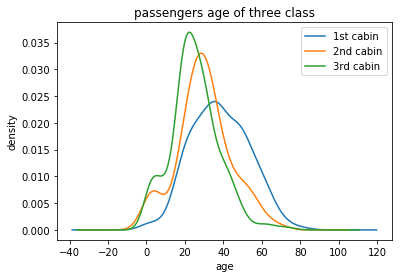

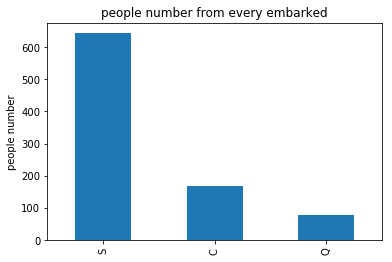

In [236]:
fig = plt.figure()
fig.set(alpha=0.2)  #alpha


data_train.Survived.value_counts().plot(kind='bar')#
plt.title(u"survived or not") #
plt.ylabel(u"people number")  
plt.show()


data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"people number")
plt.title(u"class of passengers")
plt.show()


plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"age")                         #
plt.grid(b=True, which='major', axis='y') 
plt.title(u"correlation between age and survival")
plt.show()


data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")# plots an axis lable
plt.ylabel(u"density") 
plt.title(u"passengers age of three class")
plt.legend((u'1st cabin', u'2nd cabin',u'3rd cabin'),loc='best')
plt.show()


data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"people number from every embarked")
plt.ylabel(u"people number")
plt.show()

/home/hmx/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


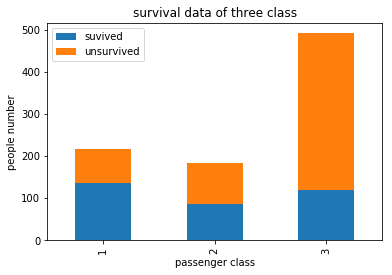

In [217]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  #alpha

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'suvived':Survived_1, u'unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"survival data of three class")
plt.xlabel(u"passenger class") 
plt.ylabel("people number") 
plt.show()

/home/hmx/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


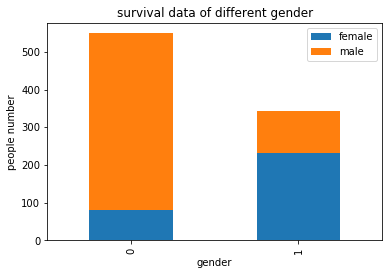

In [218]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  #alpha

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'male':Survived_m, u'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"survival data of different gender")
plt.xlabel(u"gender") 
plt.ylabel(u"people number")
plt.show()

In [237]:
def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
#data_train = set_Cabin_type(data_train)

In [220]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [238]:
#deal with train data
#set gender to be number
'''
for ii in range(890):
    if data_train.iloc[ii][4]=='female':
        data_train.iloc[ii][4]=0
    elif data_train.iloc[ii][4]=='male':
        data_train.iloc[ii][4]=1
        '''
data_train['Gender']=data_train['Sex'].astype('category')
data_train['Gender'].cat.categories=[0,1]
data_train['Port']=data_train['Embarked'].astype('category')
data_train['Port'].cat.categories=[0,1,2]

In [239]:
#sample some valuable data
data_train_new=data_train[['Survived','Age','Fare','Parch','SibSp','Pclass','Gender','Port']]
#print(data_train_new)
data_train_np=np.array(data_train_new)
data_train_new.info()
data_train_new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
Parch       891 non-null int64
SibSp       891 non-null int64
Pclass      891 non-null int64
Gender      891 non-null category
Port        889 non-null category
dtypes: category(2), float64(2), int64(4)
memory usage: 43.8 KB


,Survived,Age,Fare,Parch,SibSp,Pclass,Gender,Port
0,0,22.000000,7.2500,0,1,3,1,2
1,1,38.000000,71.2833,0,1,1,0,0
2,1,26.000000,7.9250,0,0,3,0,2
3,1,35.000000,53.1000,0,1,1,0,2
4,0,35.000000,8.0500,0,0,3,1,2
5,0,23.838953,8.4583,0,0,3,1,1
6,0,54.000000,51.8625,0,0,1,1,2
7,0,2.000000,21.0750,1,3,3,1,2
8,1,27.000000,11.1333,2,0,3,0,2
9,1,14.000000,30.0708,0,1,2,0,0


In [223]:
data_train_np

array([[0, 22.0, 7.25, ..., 3, 1, 2.0],
       [1, 38.0, 71.2833, ..., 1, 0, 0.0],
       [1, 26.0, 7.925, ..., 3, 0, 2.0],
       ..., 
       [0, 16.193950198412704, 23.45, ..., 3, 0, 2.0],
       [1, 26.0, 30.0, ..., 1, 1, 0.0],
       [0, 32.0, 7.75, ..., 3, 1, 1.0]], dtype=object)

In [224]:
row_len=len(data_train_np)
col_len=len(data_train_np[0])
tmp=np.zeros((row_len,col_len))
for ii in range(row_len):
    for jj in range(col_len):
        if math.isnan(data_train_np[ii][jj]):
            print('is null',ii,jj)
            tmp[ii][jj]=-1
        else:
            tmp[ii][jj]=float(data_train_np[ii][jj])
print(tmp[61][7])
#deal with age, 
#someone who 's age<12 is a teenager.
for ii in range(row_len):
    if tmp[ii][1]<16:
        tmp[ii][1]=1
    else:
        tmp[ii][1]=0
#normalize the ticket fare
max_=max(tmp[:,2])
min_=min(tmp[:,2])
tmp[:,2]=(tmp[:,2]-min_)/(max_-min_)
print(sum(sum(tmp)))
save_file=open('train_data.x','wb')
pickle.dump(tmp,save_file,True)
save_file.close()

is null 61 7
is null 829 7
-1.0
5296.00685907


In [225]:
tmp

array([[ 0.        ,  0.        ,  0.01415106, ...,  3.        ,
         1.        ,  2.        ],
       [ 1.        ,  0.        ,  0.13913574, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.01546857, ...,  3.        ,
         0.        ,  2.        ],
       ..., 
       [ 0.        ,  0.        ,  0.04577135, ...,  3.        ,
         0.        ,  2.        ],
       [ 1.        ,  0.        ,  0.0585561 , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.01512699, ...,  3.        ,
         1.        ,  1.        ]])

In [226]:
#deal with test data
data_test = pd.read_csv('test.csv')
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# according X from train set to predict age in test set
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges
data_test['Gender']=data_test['Sex'].astype('category')
data_test['Gender'].cat.categories=[0,1]
data_test['Port']=data_test['Embarked'].astype('category')
data_test['Port'].cat.categories=[0,1,2]
#sample some valuable data
data_test_new=data_test[['Age','Fare','Parch','SibSp','Pclass','Gender','Port']]
data_test_np=np.array(data_test_new)
data_test_new.info()

#save
row_len=len(data_test_np)
col_len=len(data_test_np[0])
tmp1=np.zeros((row_len,col_len))
for ii in range(row_len):
    for jj in range(col_len):
        if math.isnan(data_test_np[ii][jj]):
            print('is null',ii,jj)
            tmp1[ii][jj]=-1
        else:
            tmp1[ii][jj]=float(data_test_np[ii][jj])
#deal with age, 
#someone who 's age<16 is a teenager.
for ii in range(row_len):
    if tmp1[ii][0]<16:
        tmp1[ii][0]=1
    else:
        tmp1[ii][0]=0
#normalize the ticket fare
tmp1[:,1]=(tmp1[:,1]-min_)/(max_-min_)
print(sum(sum(tmp1)))
save_file=open('test_data.x','wb')
pickle.dump(tmp1,save_file,True)
save_file.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Age       418 non-null float64
Fare      418 non-null float64
Parch     418 non-null int64
SibSp     418 non-null int64
Pclass    418 non-null int64
Gender    418 non-null category
Port      418 non-null category
dtypes: category(2), float64(2), int64(3)
memory usage: 17.4 KB
2211.99803017
